## 5. Natural Language Processing

### Natural Language:

The way we read, write, speak

![img1](../img/5/img1.png)

#### Understanding how language works leads to understanding how human brain works

### Natural Language Processing (NLP)

- field of Computer Science  and Computational Lingustics
- integral part of AI
- driven by advances in AI

NLP is about developing applications and services that are able to understand human languages.

![residuals](../img/5/img4.png)

[source](https://www.ontotext.com/top-5-semantic-technology-trends-2017/)

### Making progress with NLP...

- gain knowledge about the language
- gain knowledge about the world
- create a way to combine knowledge sources

In [1]:
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

d = {'Spam Detection' : 2,      'Text Classification' : 1,     'Named Entities Recognition' : 2,     'Information Extraction': 2,
     'Parsing' : 1,         'Sentiment Analysis': 1,     'Speach Recognition': 2,      'Machine Translation': 2,
    'Spell Chacking' : 1,    'Keyword Searching' : 1,     'Question Answering' : 2,     'Paraphrase' : 1,
     'Summarization' : 1,      'Dialog' : 2,     'Chatbot': 2,     'Text Mining' : 3, 
    }

my_mask = np.array(Image.open("../img/5/img3.png"))

#Generating wordcloud.
#See documentation: https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py
wordcloud = WordCloud(width=2000,height=1400,  mask=my_mask, background_color="white").generate_from_frequencies(d)

print("Relevant tasks")
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Relevant tasks


<Figure size 1500x1000 with 1 Axes>

### Text mining / Text Analytics

is the proces of deriving meaningful information from natural language text.

![residuals](../img/5/img2.png)

[source](https://www.ontotext.com/top-5-semantic-technology-trends-2017/)

### Textual processing

- Regular Expressions
- Word Tokenization
- Stemming (base form or root form of words)
- Lemmatization (maps several words into the same common root)
- Sentence Segmentation

- Part-Of-Speech Tagging
- Chunking (picking up individual pieces of information; Groupong them into bigger pieces)
- Dependency Parsing

- Semantic Knowledge Base
    

### Regular Expressions

the most basic and fundamental tool for textual processing.

Variants of the same word:

#### Westminster             westminster

A common pattern is:

#### \[wW\]westminster


A pattern for any digit is:

#### \[0123456789\]

A pattern for any two digits is:

#### \[0123456789\]\{2\}




In [2]:
# Example of extracting ISINs from a list using RegEx

import re

def get_ISIN_regex(text):
    isin = re.search(r'[A-Z]{2}[A-z0-9]{9}\d\b', text)
    if isin:
        return isin.group(0)

ISIN_list = ['IE00B68JD125', 'KYG5378Q1579', 'IE000000', 'Wrong ISIN', 'Find an ISIN here: IE00B68JD125']

for isin in ISIN_list:
    print(get_ISIN_regex(isin))

IE00B68JD125
KYG5378Q1579
None
None
IE00B68JD125


### Basic text Pre-processing

1. Tokenizing words in a text
2. Normalising word formats (Stemming and Lemmatization)
3. Segmenting senteces



![residuals](../img/5/img5.png)

Above examples must have helped you understand the concept of normalization of text, although normalization of text is not restricted to only written document but to speech as well. Stemming and Lemmatization helps us to achieve the root forms (sometimes called synonyms in search context) of inflected (derived) words.
Stemming is different to Lemmatization in the approach it uses to produce root forms of words and the word produced.

[source](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python/)

In [3]:
# Let's take a sample text an look at keywords within it

import nltk
from nltk.tokenize import word_tokenize 

text = """The cracks in China's economy appear to be widening, with signs of weakening growth amid a background of trade tensions. Adding to the worries, China's stock market was the world's worst performer last year, ending with a loss of 28%.
This week Apple said slowing sales in China meant it would not meet sales expectations, triggering sharp falls on global stock markets. The tech giant isn't alone. A string of other companies have issued warnings recently over China's slowdown and the impact of the trade war with the US.
Among those are carmakers such as General Motors, Ford and Fiat Chrysler. Luxury vehicle maker Jaguar Land Rover has also warned of slowing Chinese sales.
"""
# [Source : https://www.bbc.com/news/business-46755158]

text = """U.S.-China trade talks to continue for third day - U.S. officials.
BEIJING (Reuters) - The United States and China will continue trade talks in Beijing for an unscheduled third day, a member of the U.S. delegation said on Tuesday, as the world’s two largest economies looked to resolve their bitter trade dispute.
Steven Winberg, Assistant Secretary for Fossil Energy at the U.S. Department of Energy told reporters at the U.S. delegation’s hotel that talks, which began on Monday, had gone well.

“I confirm we’re continuing tomorrow, yes,” Winberg told reporters, declining to answer further questions.

A spokeswoman for the U.S. Trade Representative’s office, which is leading the U.S. negotiating team, also said talks would continue on Wednesday and “a statement will likely follow then.”
"""

# [Source](https://uk.reuters.com/article/uk-usa-trade-china/u-s-china-trade-talks-to-continue-for-third-day-u-s-officials-idUKKCN1P215X)


In [4]:
tokens = word_tokenize(text)

def print_frequent_tokens(tokens):
    freq = nltk.FreqDist(tokens)
    for key,val in freq.items():
        if val > 2:
            print (str(key) + '\t:\t' + str(val))
    print("\nThe total number of unique keywords in the text is %s" % len(freq))
    
print_frequent_tokens(tokens)

talks	:	4
’	:	4
continue	:	3
,	:	10
the	:	6
.	:	5
s	:	3
to	:	3
on	:	3
for	:	4
trade	:	3
U.S.	:	6

The total number of unique keywords in the text is 94


### Stemming

Stemming is the process of reducing words to their word stem, base or root form.

Porter Stemmer is a popular stemmer of English

Examples:

    weight     -> weight
    natural    -> natur
    language   -> languag
    processing -> process

In [5]:
stemmer = nltk.stem.PorterStemmer()

tokens_stemmed = [stemmer.stem(token) for token in tokens]

print_frequent_tokens(tokens_stemmed)

’	:	4
continu	:	4
,	:	10
.	:	5
talk	:	4
the	:	7
for	:	4
s	:	3
to	:	3
u.s.	:	6
on	:	3
trade	:	4

The total number of unique keywords in the text is 90


### Lemmatization

Lemmatisation in linguistics, is the process of grouping together the different forms of a word so they can be analysed as a single item.

#### How to use Lemmatizer in NLTK

The NLTK Lemmatization method is based on WordNet’s built-in morphy function. Here is the introduction from WordNet official website:

WordNet® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept.

[Source](https://textminingonline.com/dive-into-nltk-part-iii-part-of-speech-tagging-and-pos-tagger)

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yauheniya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

tokens_lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]

print_frequent_tokens(tokens_lemmatized)

’	:	4
continue	:	3
,	:	10
.	:	5
talk	:	4
the	:	6
s	:	3
a	:	3
to	:	3
on	:	3
for	:	4
trade	:	3
U.S.	:	6

The total number of unique keywords in the text is 93


#### Stemming or lemmatization?

- Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

- Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma.

### Removing Stop Words

Text may contain stop words like ‘the’, ‘is’ and ‘are’ that do not carry any significant semantic meaning. 
Stop words can be filtered from the text to be processed. 
There is no universal list of stop words in nlp research, however the nltk module contains a list of stop words.


In [8]:
import random
from nltk.corpus import stopwords  
stop_words = set(stopwords.words('english'))

print("Here is a random sample of 10 words from a list of stop words in NLTK ")
print(random.sample(stop_words, 10))

Here is a random sample of 10 words from a list of stop words in NLTK 
['hadn', 'me', 'him', 'should', "wouldn't", 'couldn', "that'll", 'is', 'same', "don't"]


In [9]:
### Removing Stop words
tokens_filtered = [w for w in tokens_lemmatized if not w in stop_words] 
        
print_frequent_tokens(tokens_filtered)

.	:	5
talk	:	4
continue	:	3
’	:	4
,	:	10
trade	:	3
U.S.	:	6

The total number of unique keywords in the text is 72


### Sentence Segmentation

Sentence boundary disambiguation (SBD), also known as Sentence Breaking or Sentence Segmentation, is the problem in natural language processing of deciding where sentences begin and end. Often natural language processing tools require their input to be divided into sentences for a number of reasons. 

However sentence boundary identification is challenging because punctuation marks are often ambiguous. For example, a period may denote an abbreviation, decimal point, an ellipsis, or an email address – not the end of a sentence. About 47% of the periods in the Wall Street Journal corpus denote abbreviations. As well, question marks and exclamation marks may appear in embedded quotations, emoticons, computer code, and slang.

[Source](https://textminingonline.com/dive-into-nltk-part-ii-sentence-tokenize-and-word-tokenize)

In [10]:
from nltk.tokenize import sent_tokenize

sent_tokenize_list = sent_tokenize(text)

print("The original text is: \n")
print(text)
print("\nThe text split into sentences: \n")
print(sent_tokenize_list)
print("\nThe first sentence is: \n")
print(sent_tokenize_list[0])

The original text is: 

U.S.-China trade talks to continue for third day - U.S. officials.
BEIJING (Reuters) - The United States and China will continue trade talks in Beijing for an unscheduled third day, a member of the U.S. delegation said on Tuesday, as the world’s two largest economies looked to resolve their bitter trade dispute.
Steven Winberg, Assistant Secretary for Fossil Energy at the U.S. Department of Energy told reporters at the U.S. delegation’s hotel that talks, which began on Monday, had gone well.

“I confirm we’re continuing tomorrow, yes,” Winberg told reporters, declining to answer further questions.

A spokeswoman for the U.S. Trade Representative’s office, which is leading the U.S. negotiating team, also said talks would continue on Wednesday and “a statement will likely follow then.”


The text split into sentences: 

['U.S.-China trade talks to continue for third day - U.S. officials.', 'BEIJING (Reuters) - The United States and China will continue trade talks 

### Part-Of-Speech Tagging

Part-of-speech tagging (POS tagging or PoS tagging or POST) is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech based on both its definition and its context.

Parts of speech tagging can be important for syntactic and semantic analysis. 

![residuals](../img/5/img6.png)

If you wish to train your own POS Tagger, go to the source link:
[Source](https://nlpforhackers.io/training-pos-tagger/)

In [11]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yauheniya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
#Part-Of-Speech Tagging

text = """The cracks in China's economy appear to be widening."""

print("Part-Of-Speech Tagging:\n")
print(nltk.pos_tag(nltk.word_tokenize(text)))

Part-Of-Speech Tagging:

[('The', 'DT'), ('cracks', 'NNS'), ('in', 'IN'), ('China', 'NNP'), ("'s", 'POS'), ('economy', 'NN'), ('appear', 'VBP'), ('to', 'TO'), ('be', 'VB'), ('widening', 'VBG'), ('.', '.')]


### spaCy 

#### Industrial-Strength Natural Language Processing

spaCy is a free open-source library for Natural Language Processing in Python. It features NER, POS tagging, dependency parsing, word vectors and more.

[Source](https://spacy.io/)
(developed by Matthew Honnibal)

In [13]:
import spacy
from spacy import displacy
nlp = spacy.load('en')

In [14]:
#Dependency Parsing

text = """Alice is Bobby's sister"""

doc = nlp(text)
displacy.render(doc, style='dep', jupyter=True)

#Vizualizer available at https://explosion.ai/demos/displacy-ent

In [15]:
#Named Entity Recognition

text = """Chelsea have signed Borussia Dortmund forward Christian Pulisic for 64m euros (£58m), 
but will loan him back to the German club until the end of the season."""

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

displacy.render(doc, style='ent', jupyter=True)

#Vizualizer available at https://explosion.ai/demos/displacy



## Practical exercise - Text Classification - Sentiments in Movie Reviews

Text classification is one of the fundamental tasks in NLP with broad applications such as sentiment analysis, spam detection,  topic labeling, intent detection, etc.

Spam detection software uses text classification to find out whether an incoming email should appear in the inbox or moved to the spam folder.

Sentiment analysis is a type of text classification whose goal is to determine the polarity of content, in particular, the opinion of the author. Sentiment analysis is useful to analyze Twitter posts to find out people's opinion of a movie, or to gather people’s opinion about a new product.

### Text Classification Workflow

![image](../img/5/img7.png)

[Source](https://developers.google.com/machine-learning/guides/text-classification/)

### Task description

We will train a text classifer for sentiment analysis using the Internet Movie Database (IMDb) movie reviews dataset.
This dataset consists of reviews posted by people on the IMDb website and corresponding labels (“positive” or “negative”) which indicate the reviewer's opinion about the movie.

[Dataset] (http://ai.stanford.edu/~amaas/data/sentiment/) is publicly available.

The first step is to gather data. 
The more training examples you have the better you are able to train the classifier.

### Gathering Data

In [16]:
def load_imdb_sentiment_analysis_dataset(data_path, seed=123):
    """Loads the IMDb movie reviews sentiment analysis dataset.

    # Arguments
        data_path: string, path to the data directory.
        seed: int, seed for randomizer.

    # Returns
        A tuple of training and validation data.
        Number of training samples: 25000
        Number of test samples: 25000
        Number of categories: 2 (0 - negative, 1 - positive)

    # References
        Mass et al., http://www.aclweb.org/anthology/P11-1015

        Download and uncompress archive from:
        http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    """
    imdb_data_path = os.path.join(data_path, 'aclImdb')
    
    imdb_data_path = data_path

    # Load the training data
    train_texts = []
    train_labels = []
    for category in ['pos', 'neg']:
        train_path = os.path.join(data_path, 'train', category)
        for fname in sorted(os.listdir(train_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(train_path, fname), encoding="utf8") as f:
                    train_texts.append(f.read())
                train_labels.append(0 if category == 'neg' else 1)

    # Load the validation data.
    test_texts = []
    test_labels = []
    for category in ['pos', 'neg']:
        test_path = os.path.join(data_path, 'test', category)
        for fname in sorted(os.listdir(test_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(test_path, fname), encoding="utf8") as f:
                    test_texts.append(f.read())
                test_labels.append(0 if category == 'neg' else 1)

    # Shuffle the training data and labels.
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)

    return train_texts, train_labels, test_texts, test_labels

#Source https://developers.google.com/machine-learning/guides/text-classification/step-2

In [17]:
%%time

import os

imdb_data_path = "../datasets/aclImdb_v1/aclImdb/"

train_texts, train_labels, test_texts, test_labels = load_imdb_sentiment_analysis_dataset(imdb_data_path, 123)

data = ((train_texts, np.array(train_labels)),
        (test_texts, np.array(test_labels)))

Wall time: 2min 1s


### Exploring the data

In [18]:
item = 10

print(train_texts[item])
print("\nLabel is %s" % "Positive" if train_labels[item] == 1 else "Negative")

This is one of those landmark films which needs to be situated in the context of time.Darkness in Tallinn was made in 1993.It was a period of chaos,confusion and gross disorder not only for ordinary denizens of Estonia but also for countless citizens of other former nations which were a part of mighty Soviet empire.It was in such a tense climate that a young country named Estonia was born.As newly established governments are known to encounter teething problems,Estonia too faced numerous troubles as some corrupt officials manipulated state machinery for filling their dirty pockets by making use of their selfish means.This is one of this film's core themes.Darkness in Tallinn appears as an Estonian film but it was made by a Finnish director Ilka Järvilaturi. He has tried his best to infuse as many possible doses of Estonian humor.This is why one can call it a comedy film of political undertones.As ordinary people are involved in this film, we can say that this film signifies good versus

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]
    
    plt.figure(figsize=(15,8))
    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=0.8, color='b')    
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)    
    plt.show()

Exploring Training set
Median number of words per sample given corpus is 173


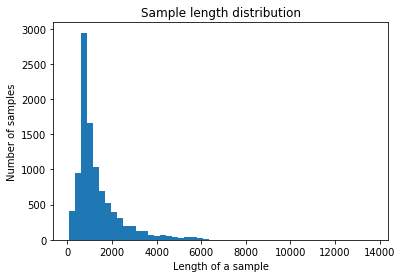

In [21]:
print("Exploring Training set")
print("Median number of words per sample given corpus is %i" % get_num_words_per_sample(train_texts))
plot_sample_length_distribution(train_texts)

Exploring Testing set
Median number of words per sample given corpus is 173


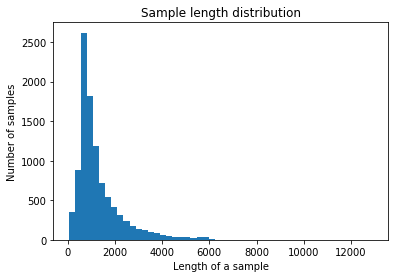

In [22]:
print("Exploring Testing set")
print("Median number of words per sample given corpus is %i" % get_num_words_per_sample(test_texts))
plot_sample_length_distribution(test_texts)

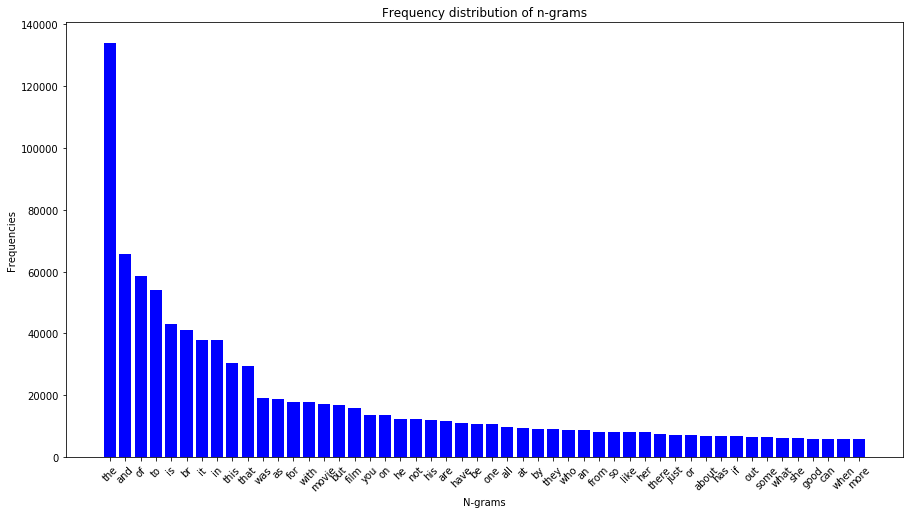

In [23]:
plot_frequency_distribution_of_ngrams(train_texts)

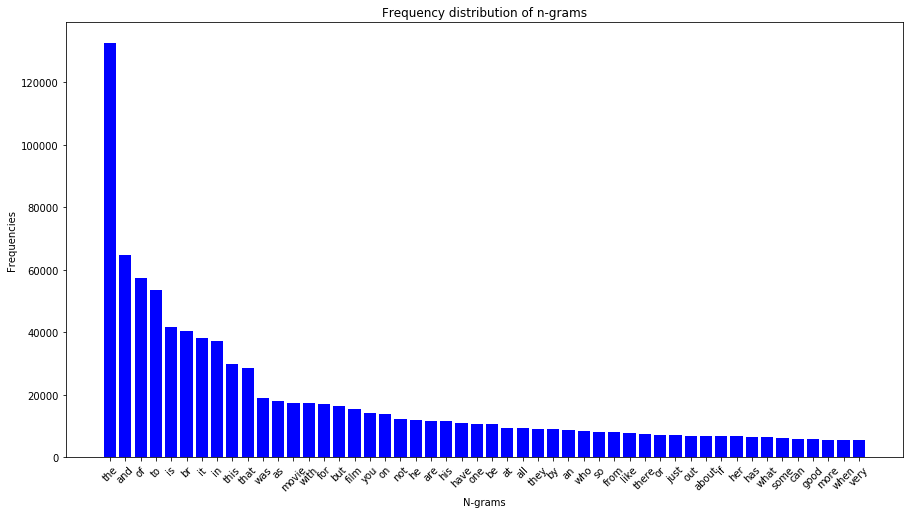

In [24]:
plot_frequency_distribution_of_ngrams(test_texts)

In [25]:
from wordcloud import WordCloud

def plot_wordcloud(text):
    """Generates wordclouds from text.
    # Arguments
        text: string, sample text.
    """    
    # Generate a word cloud image with a limited max_font_size
    wordcloud = WordCloud(max_font_size=40, background_color="white").generate(text)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Word Clouds from the Training Set


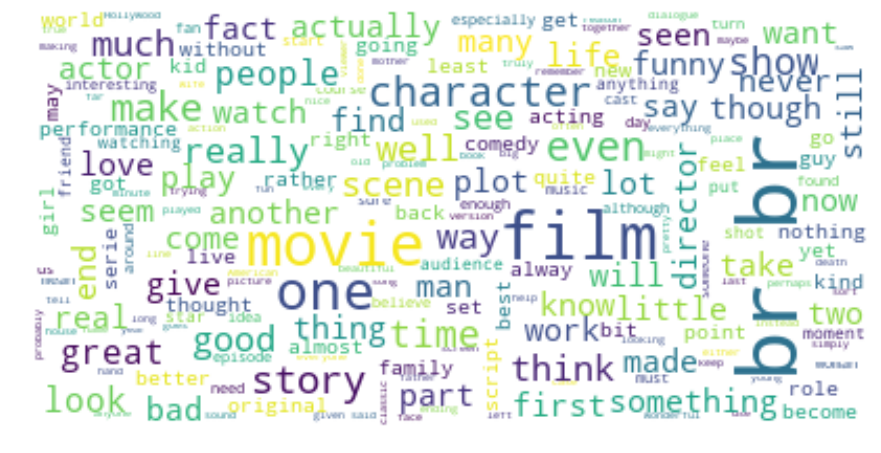

Wall time: 18.4 s


In [26]:
%%time

print("Word Clouds from the Training Set")

joined_train_text = ' '.join(train_texts)
plot_wordcloud(joined_train_text)

Word Clouds from the Testing Set


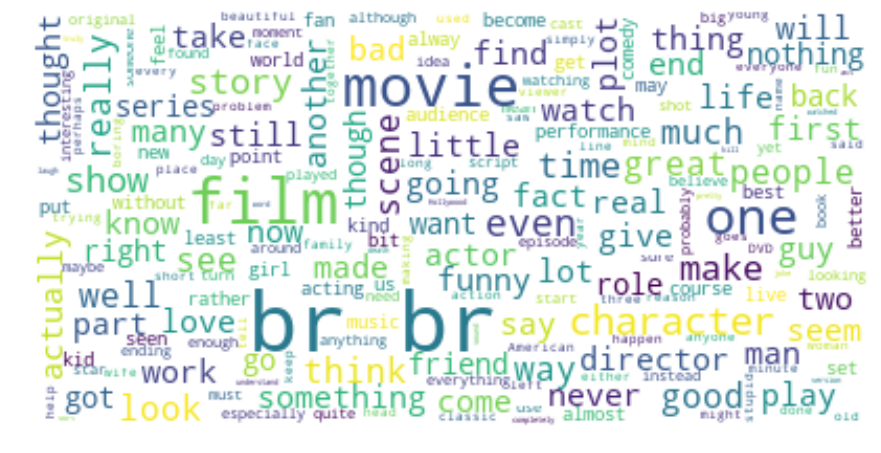

Wall time: 21.4 s


In [27]:
%%time

print("Word Clouds from the Testing Set")

joined_test_text = ' '.join(test_texts)
plot_wordcloud(joined_test_text)

### Preparing the data

In [28]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Tokenization and Vectorization
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)
# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'
# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 5
# Limit on the number of features. We use the top 20K features.
TOP_K = 10000
# Create keyword arguments to pass to the 'tf-idf' vectorizer.
kwargs = {
        'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
        'dtype': 'int32',
        'strip_accents': 'unicode',
        'decode_error': 'replace',
        'analyzer': TOKEN_MODE,  # Split text into word tokens.
        'min_df': MIN_DOCUMENT_FREQUENCY,
}

Wall time: 0 ns


In [29]:
%%time

# Tokenizing samples into unigrams + bigrams provides good accuracy while taking less compute time.
# We use Tf-idf encoding for vectorization. This usually performs better than one-hot encoding and count encoding in 
# terms of accuracy. Tf-idf uses floating point representation and takes more time to compute and uses more memory.
vectorizer = TfidfVectorizer(**kwargs)

# Learn vocabulary from training texts and vectorize training texts.
x_train = vectorizer.fit_transform(train_texts)

# Vectorize testing texts.
x_test = vectorizer.transform(test_texts)

c:\program files\python35\lib\site-packages\sklearn\feature_extraction\text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Wall time: 21.8 s


In [30]:
%%time

# When we convert texts to tokens we may end up with a large number of tokens. We want to drop rarely occurring tokens
# as well as tokens that don't contribute heavily to label predictions. 
# We use the `chi2` function to identify the top 10K features.
# Select top 'K' of the vectorized features.
selector = SelectKBest(chi2, k=min(TOP_K, x_train.shape[1]))
selector.fit(x_train, train_labels)
x_train = selector.transform(x_train)
x_test = selector.transform(x_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Wall time: 320 ms


### Building and Training the Model; Tuning hyper parameters

In [31]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-2, 10, base=2, num=4)}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, cv=4)
clf.fit(x_train, train_labels)

c:\program files\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 8 s


### Evaluating the model's performance

In [32]:
print("Best score: %s" % clf.best_score_)
print("Best parameters:")
print(clf.best_params_)

Best score: 0.9227
Best parameters:
{'C': 64.0}


In [33]:
from sklearn import metrics

pred_test = clf.predict(x_test)

print("The accuracy is %s" % str(round(100*metrics.accuracy_score(pred_test, test_labels), 2)))
print("The precision is %s" % str(round(100*metrics.precision_score(pred_test, test_labels), 2)))
print("The recall    is %s" % str(round(100*metrics.recall_score(pred_test, test_labels), 2)))
print("The F1 score  is %s" % str(round(100*metrics.f1_score(pred_test, test_labels), 2)))

The accuracy is 88.23
The precision is 86.28
The recall    is 89.78
The F1 score  is 88.0


In [34]:
print("The confusion matrix:\n")
print(metrics.confusion_matrix(pred_test, test_labels))

The confusion matrix:

[[4509  686]
 [ 491 4314]]


In [35]:
print("Classification Report: \n")
print(metrics.classification_report(pred_test, test_labels))

Classification Report: 

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      5195
           1       0.86      0.90      0.88      4805

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Deploying the model

We save the model into a pickle file.
This file can be easily loaded into a separate application for further use.

In [36]:
from sklearn.externals import joblib

#Saving the model
modelname = 'sentiment_classifier.pkl'
joblib.dump(clf, os.path.join('../output/', modelname))

['../output/sentiment_classifier.pkl']

## Conclusions

In this tutorial, we have done the following:

1. Reviewed the concepts of Natural Language Preprocessing
2. Discussed applications of NLP for solving real life problems
3. Examined textual pre-processing tasks
4. Run a practical exercise of sentiment classification
5. Explored dataset of movies reviews
6. Trained, tested and evaluated a classification model